In [1]:
# Libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection

## Web Scraping API for Passenger Volume by Bus Stops data: DO NOT RUN

In [ ]:
import requests
import pandas as pd

# Passenger volume: produces link to download csv
base_url = "http://datamall2.mytransport.sg/ltaodataservice"
endpoint = "/PV/Bus"
resource_url = base_url + endpoint
last_3_months = ['202402', '202401', '202312']
for month in last_3_months:
    query_params = {'Date': month}
    # Request data from the server
    res = requests.get(resource_url, headers={"AccountKey": "7hrdcp4vQ0inFGn4IwWHQw==", "accept": "application/json"}, params=query_params)
    res_list = res.json()
    print(res_list['value'])

  # Combining downloaded passenger volume data
df1 = pd.read_csv("../data/transport_node_bus_202402.csv")
df2 = pd.read_csv("../data/transport_node_bus_202401.csv")
df3 = pd.read_csv("../data/transport_node_bus_202312.csv")
pv_df = pd.concat([df1, df2, df3])

pv_df['PT_CODE'] = pv_df['PT_CODE'].apply(lambda x: '{:05d}'.format(x))

#save as csv file
pv_df.to_csv("pv.csv", index=False)

## Web Scraping API for Bus Stops location data: DO NOT RUN

In [ ]:
# bus stops
base_url = "http://datamall2.mytransport.sg/ltaodataservice"
endpoint_url1 = "/BusStops"
endpoint_url2 = "/BusStops?$skip=500"
endpoint_url3 = "/BusStops?$skip=1000"
endpoint_url4 = "/BusStops?$skip=1500"
endpoint_url5 = "/BusStops?$skip=2000"
endpoint_url6 = "/BusStops?$skip=2500"
endpoint_url7 = "/BusStops?$skip=3000"
endpoint_url8 = "/BusStops?$skip=3500"
endpoint_url9 = "/BusStops?$skip=4000"
endpoint_url10 = "/BusStops?$skip=4500"
endpoint_url11 = "/BusStops?$skip=5000"

endpoints = [endpoint_url1, endpoint_url2, endpoint_url3, endpoint_url4, endpoint_url5, endpoint_url6, endpoint_url7, endpoint_url8, endpoint_url9, endpoint_url10, endpoint_url11]


In [ ]:
busstops = []

for endpoint in endpoints:
    resource_url = base_url + endpoint
    # Request data from the server
    res = requests.get(resource_url, headers={"AccountKey": "7hrdcp4vQ0inFGn4IwWHQw==", "accept": "application/json"})
    res_list = res.json()
    df = pd.DataFrame(res_list['value'])
    busstops.append(df)

busstops_df = pd.concat(busstops, ignore_index=True)

print(busstops_df)

     BusStopCode           RoadName             Description  Latitude  \
0          01012        Victoria St     Hotel Grand Pacific  1.296848   
1          01013        Victoria St         St. Joseph's Ch  1.297710   
2          01019        Victoria St         Bras Basah Cplx  1.296990   
3          01029      Nth Bridge Rd            Opp Natl Lib  1.296673   
4          01039      Nth Bridge Rd              Bugis Cube  1.298208   
...          ...                ...                     ...       ...   
5101       99139  Changi Village Rd                   Blk 5  1.388195   
5102       99161          Nicoll Dr   Bef Changi Beach CP 3  1.390262   
5103       99171          Nicoll Dr       Changi Beach CP 2  1.391128   
5104       99181      Telok Paku Rd  Bef S'pore Aviation Ac  1.387754   
5105       99189      Telok Paku Rd      S'pore Aviation Ac  1.388414   

       Longitude  
0     103.852536  
1     103.853225  
2     103.853022  
3     103.854414  
4     103.855491  
...      

# Data Pre Processing

In [2]:
#load data locally
pv_df = pd.read_csv("../data/pv.csv")
busstops_df = pd.read_csv("../data/busstops.csv")
print(pv_df.head(5))
print(pv_df.info())
print(busstops_df.head(5))
print(busstops_df.info())

# Join both df
pv_df['PT_CODE'] = pv_df['PT_CODE'].apply(lambda x: '{:05d}'.format(x))
busstops_df['BusStopCode'] = busstops_df['BusStopCode'].apply(lambda x: '{:05d}'.format(x))
merged_df = pv_df.merge(busstops_df, left_on='PT_CODE', right_on='BusStopCode', how='left')
print(merged_df.head(10))
print(merged_df.info())


  YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE  PT_CODE  \
0    2024-02  WEEKENDS/HOLIDAY           17.0     BUS    45379   
1    2024-02           WEEKDAY           17.0     BUS    45379   
2    2024-02           WEEKDAY           13.0     BUS    80051   
3    2024-02  WEEKENDS/HOLIDAY           13.0     BUS    80051   
4    2024-02           WEEKDAY           13.0     BUS     5319   

   TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME  
0                  190                   120  
1                  442                   470  
2                 2873                  2873  
3                 1473                  1403  
4                  109                   540  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597316 entries, 0 to 597315
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   YEAR_MONTH            597316 non-null  object 
 1   DAY_TYPE              597316 non-null  object 
 2 

## Remove null values
Upon research, PT_CODE 65139 has been removed since Dec '23 due to route amendment

In [3]:
# Dealing with Null
null_df=merged_df[merged_df.isnull().any(axis=1)]
# print(null_df)

# Remove rows with PT_CODE 65139 and assign results back to original df
merged_df = merged_df.drop(merged_df[merged_df['PT_CODE'] == '65139'].index)
# Drop rest of null values
merged_df = merged_df.dropna()
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597253 entries, 0 to 597315
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   YEAR_MONTH            597253 non-null  object 
 1   DAY_TYPE              597253 non-null  object 
 2   TIME_PER_HOUR         597253 non-null  float64
 3   PT_TYPE               597253 non-null  object 
 4   PT_CODE               597253 non-null  object 
 5   TOTAL_TAP_IN_VOLUME   597253 non-null  int64  
 6   TOTAL_TAP_OUT_VOLUME  597253 non-null  int64  
 7   BusStopCode           597253 non-null  object 
 8   RoadName              597253 non-null  object 
 9   Description           597253 non-null  object 
 10  Latitude              597253 non-null  float64
 11  Longitude             597253 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 59.2+ MB
None


## Further Cleaning

In [4]:
# Convert TIME_PER_HOUR to int
merged_df['TIME_PER_HOUR'] = merged_df['TIME_PER_HOUR'].astype(int)
# Drop duplicate column
merged_df = merged_df.drop(columns=['BusStopCode'])

# Create a new column for average passenger volume
merged_df['avg_volume'] = (merged_df['TOTAL_TAP_IN_VOLUME'] + merged_df['TOTAL_TAP_OUT_VOLUME']) / 2
merged_df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,RoadName,Description,Latitude,Longitude,avg_volume
0,2024-02,WEEKENDS/HOLIDAY,17,BUS,45379,190,120,Choa Chu Kang Nth 6,Yew Mei Green Condo,1.394694,103.751873,155.0
1,2024-02,WEEKDAY,17,BUS,45379,442,470,Choa Chu Kang Nth 6,Yew Mei Green Condo,1.394694,103.751873,456.0
2,2024-02,WEEKDAY,13,BUS,80051,2873,2873,Sims Ave,Aft Lor 1 Geylang,1.312515,103.873262,2873.0
3,2024-02,WEEKENDS/HOLIDAY,13,BUS,80051,1473,1403,Sims Ave,Aft Lor 1 Geylang,1.312515,103.873262,1438.0
4,2024-02,WEEKDAY,13,BUS,05319,109,540,Church St,OCBC Ctr,1.284437,103.849114,324.5


# Feature Engineering

## One-Hot Encoding to encode categorical features - Road Names, Day Type

In [5]:
# Define features and target variable
X = merged_df[['DAY_TYPE', 'TIME_PER_HOUR', 'RoadName']]
y = merged_df['avg_volume']

# Perform one-hot encoding for categorical features
cat_features = ['DAY_TYPE', 'RoadName']
X_encoded = pd.get_dummies(X, columns=cat_features, dtype=float)
X_encoded.info()
X_encoded.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597253 entries, 0 to 597315
Columns: 845 entries, TIME_PER_HOUR to RoadName_Zion Rd
dtypes: float64(844), int64(1)
memory usage: 3.8 GB


,TIME_PER_HOUR,DAY_TYPE_WEEKDAY,DAY_TYPE_WEEKENDS/HOLIDAY,RoadName_AYE,RoadName_Adam Rd,RoadName_Admiralty Dr,RoadName_Admiralty Link,RoadName_Admiralty Rd,RoadName_Admiralty Rd East,RoadName_Admiralty Rd West,...,RoadName_Yishun Ring Rd,RoadName_Yishun St 31,RoadName_Yishun St 41,RoadName_Yishun St 42,RoadName_Yishun St 61,RoadName_Yishun St 71,RoadName_Yishun St 81,RoadName_Yuan Ching Rd,RoadName_Yung Ho Rd,RoadName_Zion Rd
0,17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split train and test sets

In [6]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train.describe()
y_train.describe()

count    477802.000000
mean        562.479927
std        1809.929884
min           0.500000
25%          45.500000
50%         183.500000
75%         528.500000
max      151824.000000
Name: avg_volume, dtype: float64

# Exploratory Data Analysis

## Principal Component Analysis (PCA)

Variance explained by each principal component: [0.00236757 0.00118832]


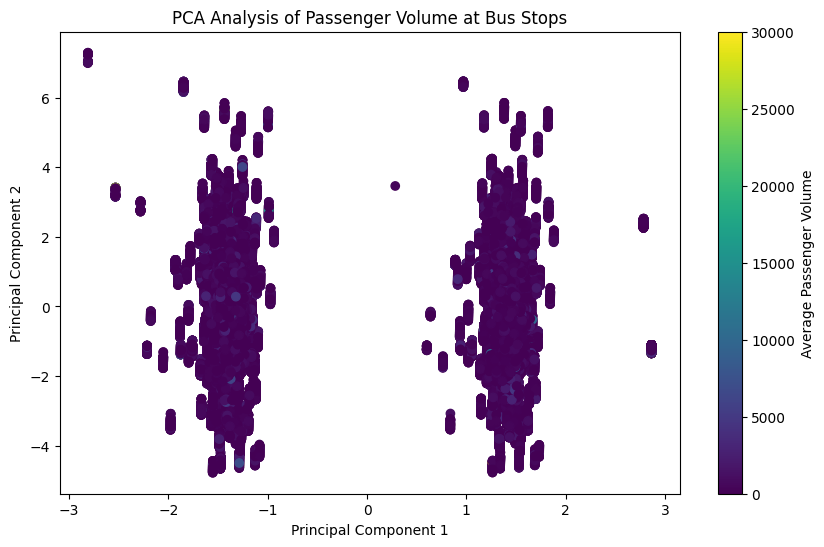

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Perform PCA
pca = PCA(n_components=2)  # Specify to keep 2 components
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print("Variance explained by each principal component:", explained_variance)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate PCA results with the original DataFrame
final_df = pd.concat([pca_df, merged_df[['avg_volume']]], axis=1)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(final_df['PC1'], final_df['PC2'], c=final_df['avg_volume'], cmap='viridis', vmin=0, vmax=30000)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis of Passenger Volume at Bus Stops')
plt.colorbar(label='Average Passenger Volume')
plt.show()


## Distribution of Average Passenger Volume based on Hour of the Day

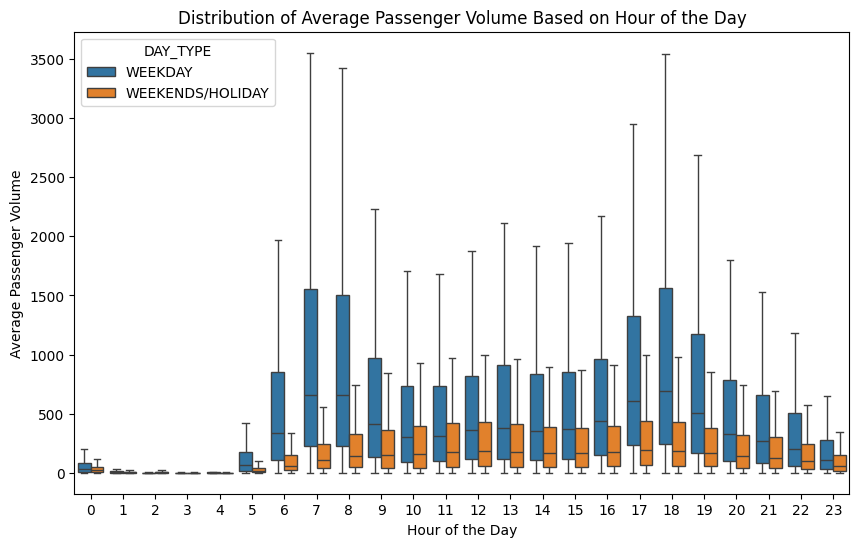

In [ ]:
# Plot the distribution of average passenger volume based on hour of the day
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIME_PER_HOUR', y='avg_volume', hue='DAY_TYPE', data=merged_df, showfliers=False)
plt.title('Distribution of Average Passenger Volume Based on Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Volume')
plt.show()

# Model Development

## k -Nearest Neighbor (kNN) Regression

In [ ]:
#Manhattan and Euclidean distance generalised into Minkowski distance
def minkowski_distance(a, b, p):
    """
    Args:
      a (D) : a data point in numpy array of dimension D
      b (D) : a data point in numpy array of dimension D
      p     : distance order
    Returns:
      dis(float): the Minkowski distance between the two data points
    """
    dis = 0
    c = np.abs(a - b)
    dis = np.linalg.norm(c, ord = p)

    return dis

In [ ]:
#Find k nearest neighbours
def find_kNN_labels(distances, labels, k):
    """
    Args:
      distances (m,) : a numpy array of dimension m that contains the distances between the test data point and all training data points
      labels (m,) : a list of length m that contains the labels of all training data points
      k: the number of nearest neighbors
    Returns:
      knn_labels (k,): the labels of the k nearest neighbors
    """

    knn_labels = []
  
    sorted_indices = np.argsort(distances)
    k_indices = sorted_indices[:k]
    knn_labels = [labels[i] for i in k_indices]
    
    return knn_labels



In [ ]:
#Find majority class
def get_majority_class(labels):
    """
    Args:
      labels(m): The corresponding labels of current sub-dataset
          m: num_rows
    Returns:
      major: Type:String. The major class of this sub-dataset(e.g "Good Wine" or "Not Good")
    """
    major = ""

    # freq will store the number of occurences of the target labels
    freq = {}
    for entry in labels:
        if (entry in freq):
            freq[entry] += 1.0
        else:
            freq[entry] = 1.0

    major = ""
  
    max_freq = 0
    for entry, frequency in freq.items():
      if frequency > max_freq:
        major = entry
        max_freq = frequency
 
    return major

## Random Forest Regression

### Hyperparamter Tuning for Random Forest Regressor

In [8]:
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# define parameter grid to search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} 


# create Random Forest Regressor model
reg = RandomForestRegressor(random_state = 42)

# instantiate GridSearchCV
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# perform Grid Search to find best parameters for hyperparameter tuning
grid_search.fit(X_train, y_train)

# find best parameters
print("Best Parameters:", grid_search.best_params_)

KeyboardInterrupt: 

### Random Forest Regressor Model

In [ ]:
from sklearn.metrics import mean_squared_error

# build model with best paramters
reg = RandomForestRegressor()

# fit model
reg.fit(X_train, y_train)

# make predictions
y_pred = reg.predict(X_test)

# evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))